In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# Read from extracted data
df = pd.read_csv('../data/test_scaled_2022-10-30_0834.csv')

In [3]:
df.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,origin_region_Midwest,origin_region_Northeast,origin_region_South,origin_region_West,dest_region_Midwest,...,mean_payload_per_departure,mean_seats_per_departure,mean_passengers_per_departure,mean_freight_per_departure,mean_mail_per_departure,mean_empty_seats_per_departure,mean_dep_delay_carrier_origin_month,mean_arr_delay_carrier_origin_month,mean_dep_delay_carrier_origin_date_t-1_year_month,mean_arr_delay_carrier_origin_date_t-1_year_month
0,2020-01-01,WN,4598,13891,14831,0.0,0.0,0.0,1.0,0.0,...,-0.164845,0.105692,-0.573215,-0.239047,-0.346659,0.98507,-0.354667,-0.148694,-0.354667,-0.148694
1,2020-01-01,WN,4761,13891,14831,0.0,0.0,0.0,1.0,0.0,...,-0.164845,0.105692,-0.573215,-0.239047,-0.346659,0.98507,-0.354667,-0.148694,-0.354667,-0.148694
2,2020-01-01,WN,5162,13891,14831,0.0,0.0,0.0,1.0,0.0,...,-0.164845,0.105692,-0.573215,-0.239047,-0.346659,0.98507,-0.354667,-0.148694,-0.354667,-0.148694
3,2020-01-01,WN,5684,13891,14831,0.0,0.0,0.0,1.0,0.0,...,-0.164845,0.105692,-0.573215,-0.239047,-0.346659,0.98507,-0.354667,-0.148694,-0.354667,-0.148694
4,2020-01-01,WN,6152,13891,14831,0.0,0.0,0.0,1.0,0.0,...,-0.164845,0.105692,-0.573215,-0.239047,-0.346659,0.98507,-0.354667,-0.148694,-0.354667,-0.148694


In [4]:
df.columns

Index(['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'origin_region_Midwest', 'origin_region_Northeast',
       'origin_region_South', 'origin_region_West', 'dest_region_Midwest',
       'dest_region_Northeast', 'dest_region_South', 'dest_region_West',
       'arr_hrs_ctg_Afternoon', 'arr_hrs_ctg_Evening', 'arr_hrs_ctg_Morning',
       'arr_hrs_ctg_Night', 'dep_hrs_ctg_Afternoon', 'dep_hrs_ctg_Evening',
       'dep_hrs_ctg_Morning', 'dep_hrs_ctg_Night', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'haul_length_long', 'haul_length_medium', 'haul_length_short',
       'crs_elapsed_time', 'distance', 'mean_payload_per_departure',
       'mean_seats_per_departure', 'mean_passengers_per_departure',
       'mean_freight_per_departure', 'mean_mail_per_departure',
       'mean_empty_seats_per_departure', 'mean

In [5]:
columns_for_ID =[
'fl_date',
 'mkt_carrier',
 'mkt_carrier_fl_num','origin_airport_id', 'dest_airport_id']

df = df.set_index(columns_for_ID)

#### XGBoost

In [6]:
# Load the XGBoost model from Pickle
xgb_model = pickle.load(open('XGBoost_2022-10-29_2305.pickle', 'rb'))

In [7]:
model_name =  'xgb' # model name here
column_name = 'predicted_delay_'+model_name
results = pd.DataFrame(xgb_model.predict(df),columns=[column_name], 
    index=df.index) # test_scaled is name of the test_flights dataframe

#### Random Forest

In [8]:
# Load the XGBoost model from Pickle
rf_model = pickle.load(open('Random_Forest_2022-10-29_2317.pickle', 'rb'))

In [9]:
model_name =  'random_forest' # model name here
column_name = 'predicted_delay_'+model_name
results[column_name] = rf_model.predict(df)

In [10]:
results

predicted_delay_xgb  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                        
2020-01-01 WN          4598               13891             14831                       0.517126   
                       4761               13891             14831                      -0.207779   
                       5162               13891             14831                      -0.350529   
                       5684               13891             14831                      -0.294032   
                       6152               13891             14831                       0.275515   
...                                                                                          ...   
2020-01-31 DL          4948               10721             14492                      -0.339549   
                       4950               10397             15323                      -0.258003   
                       4954               11193             11278                      -0.023451   
                                          11278             11193                      -0.645971   
                       4955               11278             11193                      -0.629611   

                                                                             predicted_delay_random_forest  
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                                 
2020-01-01 WN          4598               13891             14831                                 0.403912  
                       4761               13891             14831                                 0.257856  
                       5162               13891             14831                                 0.003392  
                       5684               13891             14831                                 0.020866  
                       6152               13891             14831                                 0.373457  
...                                                                                                    ...  
2020-01-31 DL          4948               10721             14492                                -0.320058  
                       4950               10397             15323                                -0.098606  
                       4954               11193             11278                                -0.161402  
                                          11278             11193                                -0.553037  
                       4955               11278             11193                                -0.668098  

[451070 rows x 2 columns]

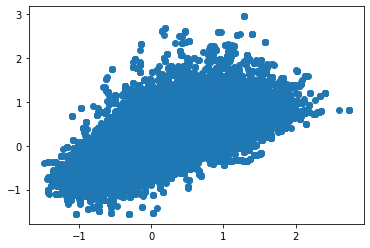

In [11]:
x = results['predicted_delay_xgb']
y = results['predicted_delay_random_forest']
plt.scatter(x, y)

In [12]:
results.to_csv("submission.csv", index=False)